<a href="https://colab.research.google.com/github/kaGhimaa/projet-gl-Announcement/blob/main/Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Model**

## **Loading the data**

In [42]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(path)

In [3]:
#Displaying  first few lines of the dataset
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## **Data preparation**

### **Data separation as X and y**

In [4]:
# splitting the data into X (Features) and y ( target )
y = df['logS']
X = df.drop('logS' , axis=1)

In [5]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [6]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Data Splitting**

In [9]:
#Split the data into training and testing sets
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)

## **Model Building**

### **Linear regression**

 #### **Training the model**

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

#### **Applying the model to make a prediction**

In [13]:
y_lr_train_pred = lr.predict(X_train) #we're doing the recall (making prediction on the original training data
#, this will allow us  to evaluate the performance of the algo )
y_lr_test_pred = lr.predict(X_test)

#### **Evaluate Model Performance**

In [20]:
lr_train_mse = mean_squared_error(y_train , y_lr_train_pred)
lr_train_r2 = r2_score(y_train , y_lr_train_pred)

print("Train mse : " , lr_train_mse)
print("Train r2_score : ", lr_test_r2)

Train mse :  1.0139894491573003
Train r2_score :  0.7705650058569232


In [21]:
lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
lr_test_r2 = r2_score(y_test , y_lr_test_pred)

print("Test mse : " , lr_test_mse)
print("Test r2_score : ", lr_test_r2)

Test mse :  0.9990844407075306
Test r2_score :  0.7705650058569232


In [26]:
#making the result look more tidy
lr_result = pd.DataFrame(['Linear_regression ', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2 ]).transpose()
lr_result.columns = ['Method', 'Training MSE', 'Training R2' , 'Test MSE', 'Test R2']

In [27]:
lr_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear_regression,1.013989,0.769513,0.999084,0.770565


### **Random Forest**

#### **Training the model**

In [29]:
rf = RandomForestRegressor(max_depth = 2 , random_state=42)
rf.fit(X_train , y_train)

RandomForestRegressor(max_depth=2, random_state=42)

#### **Applying the model to make a prediction**

In [30]:
y_rf_train_pred = rf.predict(X_train) #we're doing the recall (making prediction on the original training data
#, this will allow us  to evaluate the performance of the algo )
y_rf_test_pred = rf.predict(X_test)

#### **Evaluate model performance**

In [31]:
rf_train_mse = mean_squared_error(y_train , y_rf_train_pred)
rf_train_r2 = r2_score(y_train , y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test , y_rf_test_pred)
rf_test_r2 = r2_score(y_test , y_rf_test_pred)

In [34]:
rf_result = pd.DataFrame(['Random Forest ', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2 ]).transpose()
rf_result.columns = ['Method', 'Training MSE', 'Training R2' , 'Test MSE', 'Test R2']

In [35]:
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.050251,0.76127,1.046995,0.759562


### **Model comparison**

In [36]:
#combining the two tables to clearly compare the results
df_models = pd.concat([lr_result, rf_result] , axis=0)

In [37]:
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear_regression,1.013989,0.769513,0.999084,0.770565
0,Random Forest,1.050251,0.76127,1.046995,0.759562


In [39]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear_regression,1.013989,0.769513,0.999084,0.770565
1,Random Forest,1.050251,0.76127,1.046995,0.759562


## **Data Visualization of predicted points**


Text(0.5, 0, 'Experimental logS')

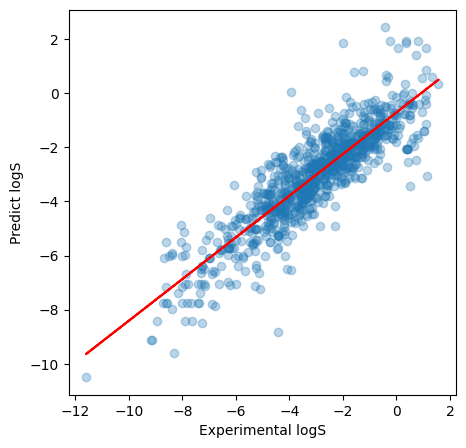

In [44]:
plt.figure(figsize=(5,5))
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3 )
plt.plot(y_train, p(y_train), c='red')
plt.ylabel("Predict logS")
plt.xlabel("Experimental logS")